## Time evolving foliar CN vs CO2, global runs to 2100

#### Load packages

In [60]:
#Load necessary packages for data visualization 
import xarray as xr
from ctsm_py import utils
#import utils
import numpy as np
import pandas as pd
from netCDF4 import num2date
import dask 

#some resources for plotting
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os,sys
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

%matplotlib inline
import pandas as pd
import datetime as dt
from datetime import datetime

#### Read in data

In [61]:
### Data for future simulations
# User defined options
model = 'CLM5_GSWP3'
## Read in slope 0 and slope 20 cases
archive = '/glade/scratch/wwieder/archive/'
caseShort = ['cnSlope0', 'cnSlope20', 'cnMulti']
cases = ['ctsm51d074_2deg_GSWP3V1_ssp370_'+short for short in caseShort]
path = '/lnd/hist/'
fin = [archive + case + path + "concat/" + case + '_cat.nc' for case in cases]
#print(fin[0])

# Read in files for .area and .landfrac
fin2 = [archive + case + path + case + '.clm2.h0.2015-01.nc' for case in cases]
#print(fin2[0])

### Read in historical data
cases2 = ['ctsm51d074_2deg_GSWP3V1_hist_'+short for short in caseShort]
finHist = [archive + case + path + "concat/" + case + '_cat.nc' for case in cases2]

# Read in files for .area and .landfrac
finHist2 = [archive + case + path + case + '.clm2.h0.1850-01.nc' for case in cases2]
print(finHist2[0])

/glade/scratch/wwieder/archive/ctsm51d074_2deg_GSWP3V1_hist_cnSlope0/lnd/hist/ctsm51d074_2deg_GSWP3V1_hist_cnSlope0.clm2.h0.1850-01.nc


In [62]:
# Read in data, time and time_bounds just used for utils.time_set_mid
var = ['NPP', 'GPP', 'LEAFCN', 'QVEGT','QVEGE', 'QSOIL','TOTVEGC', 'ELAI', 'TOTLITC','TOTLITN', 'QRUNOFF_TO_COUPLER', 'ER', 'HR','NBP', 'NET_NMIN','NFIX',
       'time', 'time_bounds']

'''select the variables we want to read in'''
def preprocess(ds, var=var):
    return ds[var]

# For slope 0
for i in range(len(cases)):
    dsIN = utils.time_set_mid(xr.open_mfdataset(fin[i], decode_times=True, preprocess = preprocess), 'time')
    LandDs = utils.time_set_mid(xr.open_mfdataset(fin2[i], decode_times=True), 'time')
    dsIN['area'] = LandDs.area
    dsIN['landfrac'] = LandDs.landfrac

    if i == 0:
        ds = dsIN
    else:
        ds = xr.concat([ds,dsIN],"case",data_vars='all')


ds = ds.assign_coords(case=("case", caseShort))
ds = ds[['NPP', 'GPP', 'LEAFCN', 'QVEGT','QVEGE', 'QSOIL','TOTVEGC', 'ELAI', 'TOTLITC','TOTLITN', 'QRUNOFF_TO_COUPLER', 'ER', 'HR','NBP', 'NET_NMIN','NFIX']]
#ds = ds.load()  # this may make things really slow now, but hopefully faster later on
ds

<xarray.Dataset>
Dimensions:             (case: 3, time: 1032, lat: 96, lon: 144)
Coordinates:
  * time                (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:0...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/16)
    NPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    GPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    LEAFCN              (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    QVEGT               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    QVEGE               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    QSOIL               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    ...                  ...
    QRUNOFF_TO_COUPLER  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    ER                  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    HR                  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NBP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NET_NMIN            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NFIX                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
Attributes: (12/100)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Mon Jul 18 07:07:16 2022: ncrcat -O...
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    NCO:                                  netCDF Operators version 5.0.3 (Hom...

In [63]:
## Read in historical data

'''select the variables we want to read in'''
def preprocess(ds2, var=var):
    return ds2[var]

# For slope 0
for i in range(len(cases)):
    dsIN2 = utils.time_set_mid(xr.open_mfdataset(finHist[i], decode_times=True, preprocess = preprocess), 'time')
    LandDs2 = utils.time_set_mid(xr.open_mfdataset(finHist2[i], decode_times=True), 'time')
    dsIN2['area'] = LandDs2.area
    dsIN2['landfrac'] = LandDs2.landfrac

    if i == 0:
        ds2 = dsIN2
    else:
        ds2 = xr.concat([ds2,dsIN2],"case",data_vars='all')


ds2 = ds2.assign_coords(case=("case", caseShort))
ds2 = ds2[['NPP', 'GPP', 'LEAFCN', 'QVEGT','QVEGE', 'QSOIL','TOTVEGC', 'ELAI', 'TOTLITC','TOTLITN', 'QRUNOFF_TO_COUPLER', 'ER', 'HR','NBP', 'NET_NMIN','NFIX']]
#ds = ds.load()  # this may make things really slow now, but hopefully faster later on
ds2

<xarray.Dataset>
Dimensions:             (case: 3, time: 1980, lat: 96, lon: 144)
Coordinates:
  * time                (time) object 1850-01-16 11:44:59.999993 ... 2014-12-...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/16)
    NPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    GPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    LEAFCN              (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QVEGT               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QVEGE               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QSOIL               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    ...                  ...
    QRUNOFF_TO_COUPLER  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    ER                  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    HR                  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NBP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NET_NMIN            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NFIX                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
Attributes: (12/100)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Mon Apr 25 05:33:00 2022: ncrcat ct...
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    NCO:                                  netCDF Operators version 5.0.3 (Hom...

In [64]:
dsFull = xr.concat([ds2,ds],"time",data_vars='all')
dsFull

<xarray.Dataset>
Dimensions:             (case: 3, time: 3012, lat: 96, lon: 144)
Coordinates:
  * time                (time) object 1850-01-16 11:44:59.999993 ... 2100-12-...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/16)
    NPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    GPP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    LEAFCN              (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QVEGT               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QVEGE               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    QSOIL               (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    ...                  ...
    QRUNOFF_TO_COUPLER  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    ER                  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    HR                  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NBP                 (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NET_NMIN            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NFIX                (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
Attributes: (12/100)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Mon Apr 25 05:33:00 2022: ncrcat ct...
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    NCO:                                  netCDF Operators version 5.0.3 (Hom...

### Convert monthly to annual

<xarray.Dataset>
Dimensions:             (time: 251, lon: 144, lat: 96, case: 3)
Coordinates:
  * time                (time) object 1850-12-16 12:00:00 ... 2100-12-16 12:0...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/16)
    NPP                 (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    GPP                 (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    LEAFCN              (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    QVEGT               (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    QVEGE               (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    QSOIL               (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    ...                  ...
    QRUNOFF_TO_COUPLER  (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    ER                  (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    HR                  (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    NBP                 (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    NET_NMIN            (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    NFIX                (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>

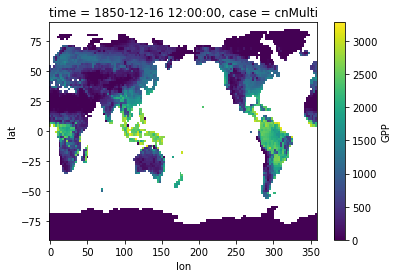

In [65]:
spy = 365 * 24 * 3600               # Convert  to annual fluxes (gC/m2/y), from gc/m2/s 
dsAnn = dsFull.apply(utils.weighted_annual_mean)
fluxes = ['GPP', 'NPP', 'NFIX', 'NET_NMIN', 'ER', 'HR', 'QVEGT', 'QVEGE','QSOIL','NBP']
for i in range(len(fluxes)):
    dsAnn[fluxes[i]] = dsAnn[fluxes[i]] * spy

dsAnn.GPP.isel(time=0, case=2).plot() ;
dsAnn

In [66]:
##Load to memory
# this seems to take forever...
dsAnn = dsAnn.load()
print('loaded data to memory')

loaded data to memory


### Calculate Litter CN

array([43.84121927, 43.84121927, 43.84121927])

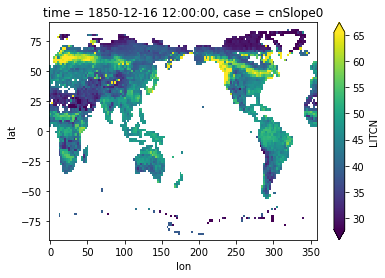

In [67]:
dsAnn['LITCN'] = dsAnn.TOTLITC / dsAnn.TOTLITN
#dsAnn.TOTMICN.values
dsAnn.LITCN.isel(time=0, case=0).plot(robust=True)
dsAnn.LITCN.mean(['lat', 'lon']).isel(time=10).values

### Check the time series

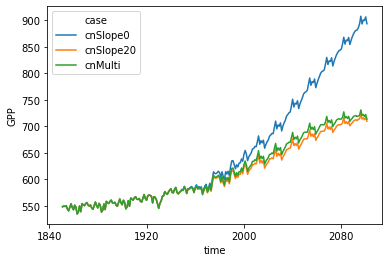

In [68]:
dsAnn.GPP.mean(['lat', 'lon']).plot(hue='case') ;
# Mask out absurd values if needed
# dsAnn['CUE'] = dsAnn.CUE.where(dsAnn.CUE > -1).where(dsAnn.CUE < 1)

### Make weights for the global sum

sum area_wgt = 0.99999994


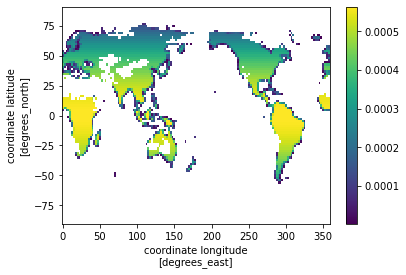

In [69]:
# only weight areas for grids with GPP>0
minGPP = 10.
landUp = LandDs.area * LandDs.landfrac * 1e6      # area in km2, not m2
landUp = landUp.where(dsAnn.GPP.isel(case=0).min('time') > minGPP)
landUp.attrs['units'] = 'm^2'

# weighting for each grid cell
area_wgt = (landUp / landUp.sum()).drop('case')
area_wgt.plot()
print('sum area_wgt = '+ str(area_wgt.sum().values) )

### Calculate the global sums

In [70]:
# ?? This could also be done regionally (see Paul's comments on google doc) ??
ann_glob = (dsAnn * landUp).sum(dim=('lat', 'lon'))

## 1 mm water = 1 kg/m2,  1e-15 for kg to Tt,  1e-15 gC to PgC,
# convert to Pg C/y, mm to Tt
Cvars = ['TOTVEGC','GPP','NPP', 'NBP', 'HR', 'ER']
Nvars = ['NFIX', 'NET_NMIN']
CNvars = ['LITCN','LEAFCN']
for i in range(len(Cvars)):
    ann_glob[Cvars[i]] = ann_glob[Cvars[i]] * 1e-15
    if Cvars[i] == 'TOTVEGC':
        
        ann_glob[Cvars[i]].attrs['units'] = 'Pg C'
    else: 
        ann_glob[Cvars[i]].attrs['units'] = 'Pg C y^-1'
         
for i in range(len(Nvars)):
    ann_glob[Nvars[i]] = ann_glob[Nvars[i]] * 1e-12
    ann_glob[Nvars[i]].attrs['units'] = 'Tg N y^-1'
        
##Add metadata
for i in range(len(Cvars)):
    ann_glob.attrs[Cvars[i]] = ann_glob.get(Cvars[i]).attrs
for i in range(len(Nvars)):
    ann_glob.attrs[Nvars[i]] = ann_glob.get(Nvars[i]).attrs


# area weighted mean
ann_Awgt = (dsAnn * area_wgt).sum(dim=('lat', 'lon'))

##Add metadata
for i in range(len(Cvars)):
    ann_Awgt.attrs[Cvars[i]] = ann_glob.get(Cvars[i]).attrs
for i in range(len(Nvars)):
    ann_Awgt.attrs[Nvars[i]] = ann_glob.get(Nvars[i]).attrs
for i in range(len(CNvars)):
    ann_Awgt.attrs[CNvars[i]] = dsAnn.get(CNvars[i]).attrs


### Varible lists and subset 2 cases to use

In [71]:
#quick plot , the `;` on the last line supresses text after executing the cell
vars = ['GPP', 'NPP', 'TOTVEGC', 'CUE', 'EFLX_LH_TOT', 'LEAFCN']
globVars = ['GPP', 'NPP', 'NBP', 'TOTVEGC', 'NFIX', 'NET_NMIN']
vars2 = ['EFLX_LH_TOT', 'LEAFCN', 'LITCN']

ann_glob_sub = ann_glob.isel(case = [0,2])
ann_Awgt_sub = ann_Awgt.isel(case = [0,2])


### Check diffs between cnMulti and cnSlope20


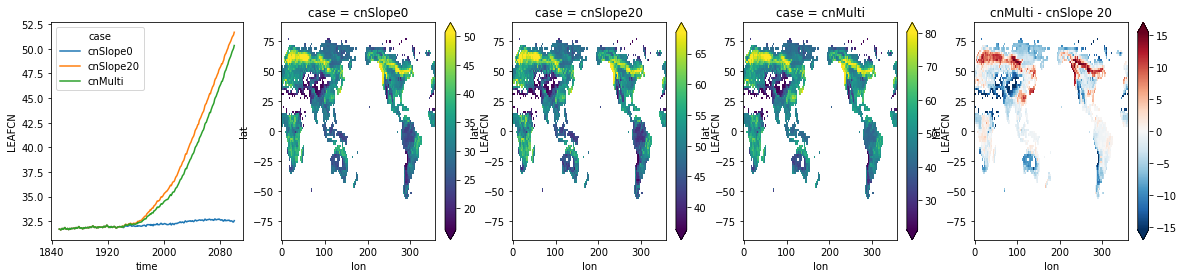

In [72]:
## Leaf and litter CN plots
# Include NPP, Nmin, Nfix, LITTERCN
minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
EcoVars = ['LEAFCN']
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(1):
    fig, ax = plt.subplots(1, 5, figsize=(20,4))
    ann_Awgt.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
    
    X = dsAnn.isel(case=0,time=slice(-1,None)).mean('time')[EcoVars[i]]
    z = dsAnn.isel(case=1,time=slice(-1,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=2,time=slice(-1,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    zdiff.attrs = ann_Awgt.get(EcoVars[i]).attrs
    if EcoVars[i] == 'LEAFCN':
        zdiff.plot(robust = True, ax = ax[4])#, cmap = 'Blues_r')
        plt.title('cnMulti - cnSlope 20');
        z.plot(robust = True, ax = ax[2])
        z20.plot(robust = True, ax = ax[3])
        X.plot(robust = True, ax = ax[1])

### Plots demonstrating C:N change implemented

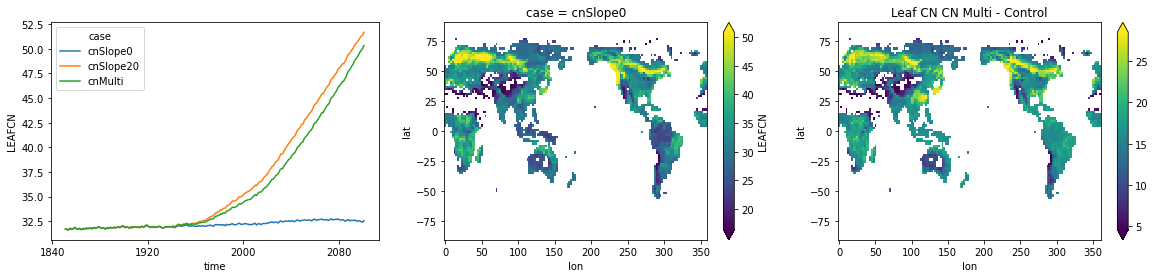

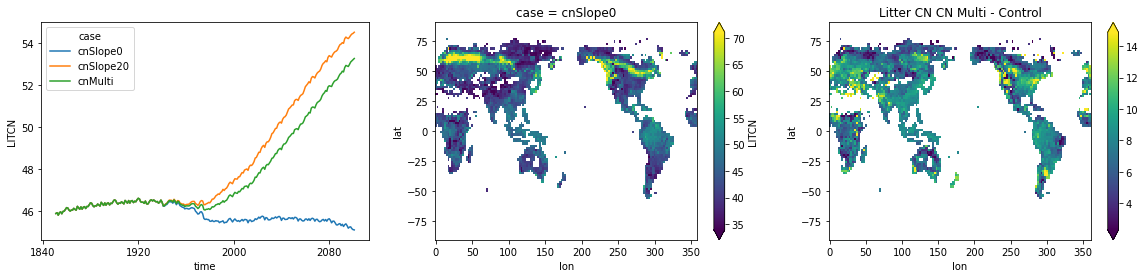

In [73]:
## Leaf and litter CN plots
# Include NPP, Nmin, Nfix, LITTERCN
minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
EcoVars = ['LEAFCN', 'LITCN']
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(2):
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    ann_Awgt.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
        
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=2,time=slice(-10,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    zdiff.attrs = ann_Awgt.get(EcoVars[i]).attrs
    if EcoVars[i] == 'LEAFCN':
        zdiff.plot(robust = True, ax = ax[2])
        plt.title('Leaf CN CN Multi - Control')
        z.plot(robust = True, ax = ax[1])#, cmap = 'Blues_r') ;
    if EcoVars[i] == 'LITCN':
        zdiff.plot(robust = True, ax = ax[2])
        plt.title('Litter CN CN Multi - Control')
        z.plot(robust = True, ax = ax[1])#, cmap = 'Reds') ;

### C Cycling plots
 - NPP, line plot, map of control, map of cnMulti - control
 - HR, line plot, map of control, map of cnMulti - control
 
 Notes: include HR only but wanted to look at ER too. ER/GPP are more similar, HR/NPP more similar. 

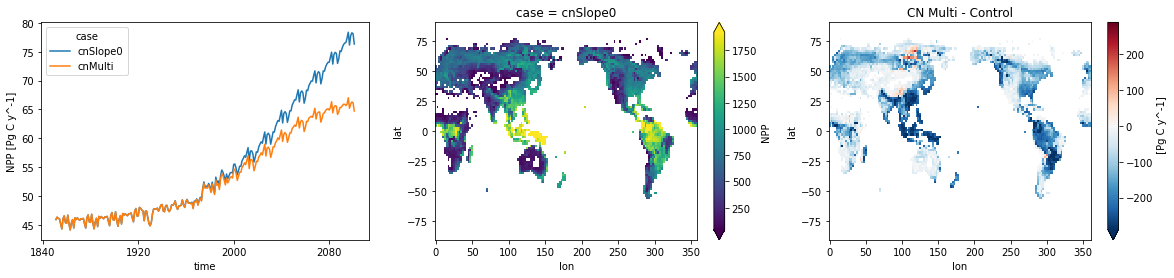

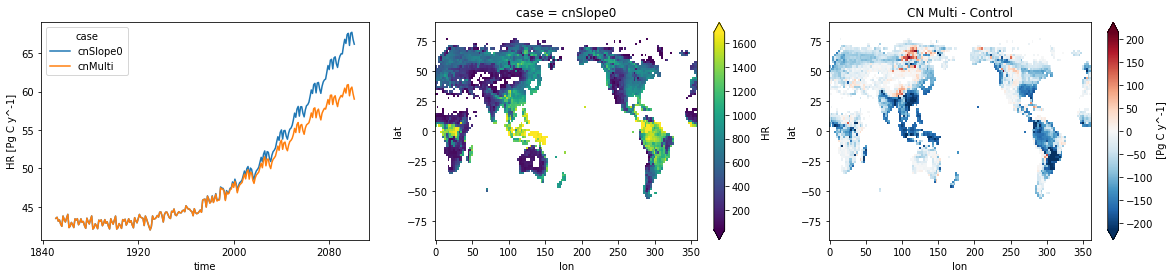

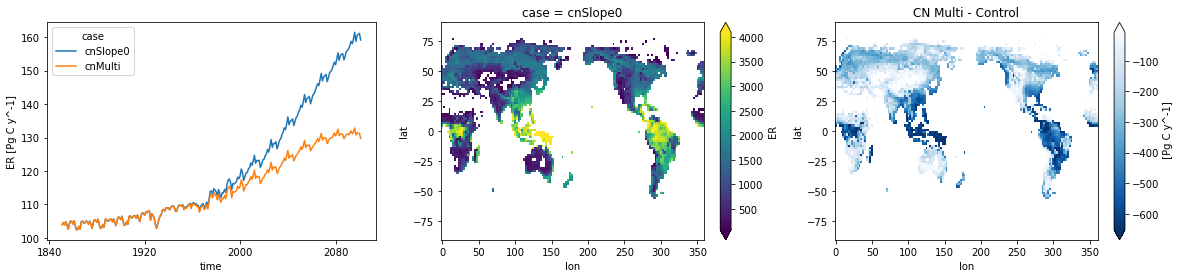

In [74]:
minGPP = 1
dsAnn = dsAnn.where(dsAnn.GPP.min('time') > minGPP)
EcoVars = ['NPP', 'HR', 'ER' ]
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(3):
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    ann_glob_sub.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
    
    ##Compare slope 0 to CN multi last 10 y
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=2,time=slice(-10,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    zdiff.attrs = ann_glob.get(EcoVars[i]).attrs
    if EcoVars[i] == 'NPP':
        z.plot(robust = True, ax = ax[1])
        plt.title('NPP Control')
        zdiff.plot(robust = True, ax = ax[2])#, cmap = 'Blues_r') ;
        plt.title('CN Multi - Control')
    if EcoVars[i] == 'HR':
        z.plot(robust = True, ax = ax[1])
        plt.title('HR Control')
        zdiff.plot(robust = True, ax = ax[2])# cmap = 'Blues_r') ;
        plt.title('CN Multi - Control')
    if EcoVars[i] == 'ER':
        z.plot(robust = True, ax = ax[1])
        plt.title('ER Control')
        zdiff.plot(robust = True, ax = ax[2], cmap = 'Blues_r') ;
        plt.title('CN Multi - Control')

### NBP Plots
4 panel plot
    a) annual average NPB, line plot
    b) cumulative NBP, line plot
    c) Map, control case NBP 2100
    d) Map, cnMulti - control case 2100

In [75]:
# Cumulative annual flux over time   
cNBP = {}
cNBP['NBP'] = ann_glob['NBP'].cumsum(dim='time').load()

In [92]:
##Make NBP part of ann_glob dataframe
dsAnn['cumNBP'] = dsAnn['NBP'].cumsum(dim='time').load()
dsAnn['cumNBP'].attrs['units'] = 'Pg C'

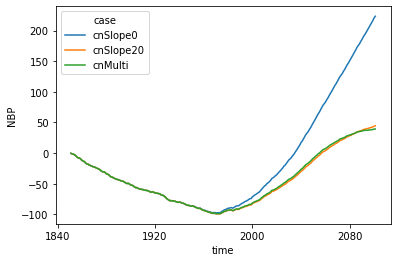

In [85]:
cNBP['NBP'].plot(hue = 'case');

### Read in csv file of 2016 GCP data to add to NBP plot


In [93]:
gcp = pd.read_csv('GCP_2016.csv')

In [94]:
UC = 0.8
landHigh = gcp.Land - gcp.LULCC + UC
landLow = gcp.Land - gcp.LULCC - UC
land = gcp.Land- gcp.LULCC
cum_Land = land.cumsum()
cum_LandH = landHigh.cumsum()
cum_LandL =  landLow.cumsum()

In [95]:
from datetime import date

start = date(1960, 1, 1) 
end = date(2016, 1, 1)

year_range = [year for year in range(start.year, end.year +1)]

start2 = date(1960, 1, 1) 
end2 = date(2099, 1, 1)

year_range2 = [year for year in range(start2.year, end2.year +1)]

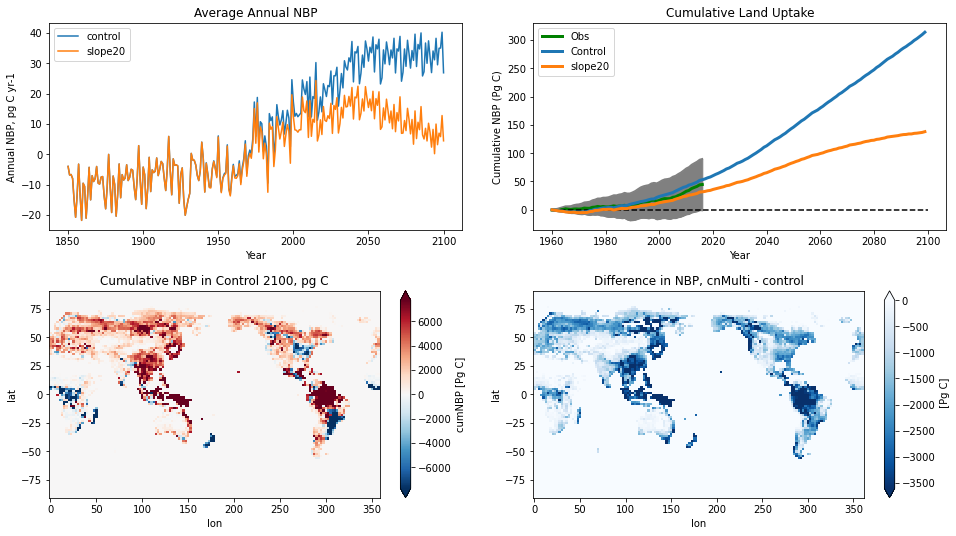

In [99]:
###Plot a) Annual average NBP
fig, axs = plt.subplots(2, 2,  figsize=(14,8))
fig.tight_layout(pad=4)
NBP1 = ann_Awgt.isel(case = 1)
NBP1.attrs['NBP'] = ann_glob.get('NBP').attrs
NBP0 = ann_Awgt.isel(case = 0)
NBP0.attrs['NBP'] = ann_glob.get('NBP').attrs

axs[0,0].plot(ann_Awgt_sub.coords['time.year'], NBP0.get('NBP'), label = "control");
axs[0,0].plot(ann_Awgt_sub.coords['time.year'], NBP1.get('NBP'), label = "slope20");
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Annual NBP, pg C yr-1')
axs[0,0].set_title('Average Annual NBP');
axs[0,0].legend(loc='upper left');


### Plotb)
axs[0,1].plot(year_range,cum_Land, linewidth = 3, label = "Obs", color = "green")
axs[0,1].plot(year_range,cum_LandH, color = 'grey')
axs[0,1].plot(year_range,cum_LandL, color = 'grey')
axs[0,1].fill_between(year_range, cum_LandH,cum_LandL, color='grey')
axs[0,1].hlines(0,1960, 2100, color = 'black', linestyles = 'dashed')
control = cNBP['NBP'].sel(time = slice('1960-12-16','2099-12-16'), case = 'cnSlope0').values + (93.3203492)
cnMulti = cNBP['NBP'].sel(time = slice('1960-12-16','2099-12-16'), case = 'cnSlope20').values + (93.92729433)
axs[0,1].plot(year_range2,control, linewidth = 3, label = 'Control', color = "#1f77b4")
axs[0,1].plot(year_range2,cnMulti, linewidth = 3, label = "slope20", color = "#ff7f0e");
axs[0,1].set_title('Cumulative Land Uptake')
axs[0,1].set_ylabel('Cumulative NBP (Pg C)');
axs[0,1].set_xlabel('Year')
axs[0,1].legend();


### plot c) first map, just use 2100 or average of last 10 years? 
z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')['cumNBP']# Climatology for last 10 years of data
zMulti = dsAnn.isel(case=1,time=slice(-10,None)).mean('time')['cumNBP']
zdiff = zMulti - z
zdiff = utils.cyclic_dataarray(zdiff)
lat = zdiff.coords['lat']
lon = zdiff.coords['lon']
##Metadata needs added here for plots. 
zdiff.attrs = dsAnn.get('cumNBP').attrs
z.attrs = dsAnn.get('cumNBP').attrs
z.plot(robust = True, ax = axs[1,0]);#, cmap = 'Blues_r') ;
axs[1,0].set_title('Cumulative NBP in Control 2100, pg C')
zdiff.plot(robust = True, ax = axs[1,1], cmap = 'Blues_r'); #, cmap = 'Blues_r') 
axs[1,1].set_title('Difference in NBP, cnMulti - control');
# plt.title('CN Multi - Control')



### Water cycle varibles
- ET
- Runoff


AttributeError: 'Dataset' object has no attribute 'cumNPB'

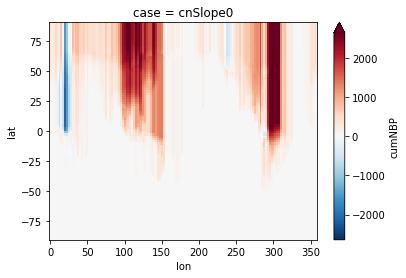

In [83]:
z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')['cumNBP']
z.plot(robust=True)

In [91]:
dsAnn.cumNBP

<xarray.DataArray 'cumNBP' (case: 3, time: 251, lat: 96, lon: 144)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [-4.96507731e+02, -2.70368898e+02, -2.10832326e+02, ...,
          -6.30570089e+02, -6.12304900e+02, -6.00378175e+02],
         [-4.96507731e+02, -2.70368898e+02, -2.10832326e+02, ...,
          -6.30570089e+02, -6.12304900e+02, -6.00378175e+02],
         [-4.96507731e+02, -2.70368898e+02, -2.10832326e+02, ...,
          -6.30570089e+02, -6.12304900e+02, -6.00378175e+02]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
         [-3.19069471e-01,  6.06741069e+01, -2.41863558e+02, ...,
           2.32975767e+02,  3.59628705e+01, -1.00672218e+02],
         [-3.19069471e-01,  6.06741069e+01, -2.41863558e+02, ...,
           2.32975767e+02,  3.59628705e+01, -1.00672218e+02],
         [-3.19069471e-01,  6.06741069e+01, -2.41863558e+02, ...,
           2.32975767e+02,  3.59628705e+01, -1.00672218e+02]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 4.72405272e+01,  9.14416325e+00, -3.88906511e+02, ...,
          -2.56739567e+02, -2.99729868e+02, -6.22471390e+01],
         [ 4.72405272e+01,  9.14416325e+00, -3.88906511e+02, ...,
          -2.56739567e+02, -2.99729868e+02, -6.22471390e+01],
         [ 4.72405272e+01,  9.14416325e+00, -3.88906511e+02, ...,
          -2.56739567e+02, -2.99729868e+02, -6.22471390e+01]]]])
Coordinates:
  * time     (time) object 1850-12-16 12:00:00 ... 2100-12-16 12:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * case     (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Attributes:
    units:    Pg C

AttributeError: 'NoneType' object has no attribute 'plot'

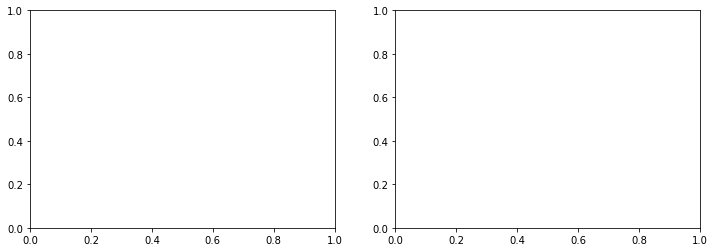

In [29]:
##Plot N vars

## Ecosystem feedback plots
# Include NPP, Nmin, Nfix, LITTERCN
EcoVars = ['FFIX_TO_SMINN', 'NFIX', 'NET_NMIN']
minVal = 0
#EcoVars[i] = dsAnn.GPP.where(dsAnn.GPP.min('time') > minGPP)

for i in range(3):
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    ann_glob.get(EcoVars[i]).plot(hue='case', ax = ax[0]);
    plt.title(EcoVars[i]);
    
    ##Compare last 10 y of slope 0 case and CN multi
    z = dsAnn.isel(case=0,time=slice(-10,None)).mean('time')[EcoVars[i]]# Climatology for last 10 years of data
    z20 = dsAnn.isel(case=2,time=slice(-10,None)).mean('time')[EcoVars[i]]
    zdiff = z20 - z
    zdiff = utils.cyclic_dataarray(zdiff)
    lat = zdiff.coords['lat']
    lon = zdiff.coords['lon']
    ##Metadata needs added here for plots. 
    zdiff.attrs = ann_glob.get(EcoVars[i]).attrs
    if EcoVars[i] == 'NFIX':
        zdiff.plot(robust = True, ax = ax[1], cmap = 'Blues_r') ;
    if EcoVars[i] == 'FFIX_TO_SMINN':
        zdiff.plot(robust = True, ax = ax[1])#, cmap = 'Blues_r') ;
    if EcoVars[i] == 'NET_NMIN':
        zdiff.plot(robust = True, ax = ax[1])#, cmap = 'Blues_r') ;
    plt.title(EcoVars[i])

In [115]:
z

<xarray.DataArray 'cumNBP' (lat: 96, lon: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
    case     <U9 'cnSlope0'

In [57]:
cNBP

{'NBP': <xarray.DataArray 'NBP' (case: 3, time: 251)>
 array([[-4.14388127e-01, -1.12315779e+00, -1.81588674e+00,
         -2.64566118e+00, -4.22184292e+00, -6.38147745e+00,
         -7.79492639e+00, -8.13105540e+00, -9.53132479e+00,
         -1.17965955e+01, -1.27881013e+01, -1.38874936e+01,
         -1.60779737e+01, -1.75047672e+01, -1.79504644e+01,
         -1.95115912e+01, -2.02429617e+01, -2.11755808e+01,
         -2.20091393e+01, -2.24266493e+01, -2.34163196e+01,
         -2.44357372e+01, -2.52145829e+01, -2.59768111e+01,
         -2.74045177e+01, -2.92727594e+01, -3.04198701e+01,
         -3.04225198e+01, -3.15275933e+01, -3.35225893e+01,
         -3.42668506e+01, -3.52923304e+01, -3.74132813e+01,
         -3.87989385e+01, -3.91293114e+01, -4.06192597e+01,
         -4.13153552e+01, -4.21984378e+01, -4.30076522e+01,
         -4.33663241e+01, -4.42650258e+01, -4.50525948e+01,
         -4.55648176e+01, -4.61082899e+01, -4.72353748e+01,
         -4.87885369e+01, -4.96317214e+01, -4.

In [96]:
dsAnn

<xarray.Dataset>
Dimensions:             (time: 251, lon: 144, lat: 96, case: 3)
Coordinates:
  * time                (time) object 1850-12-16 12:00:00 ... 2100-12-16 12:0...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * case                (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables: (12/17)
    NPP                 (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    GPP                 (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    LEAFCN              (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    QVEGT               (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    QVEGE               (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    QSOIL               (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    ...                  ...
    ER                  (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    HR                  (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    NBP                 (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    NET_NMIN            (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    NFIX                (case, time, lat, lon) float64 dask.array<chunksize=(1, 165, 96, 144), meta=np.ndarray>
    cumNBP              (case, time, lat, lon) float64 0.0 0.0 ... -311.7 -126.7